In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

train_original = pd.read_csv("train_ctrUa4K.csv")
test_original = pd.read_csv("test_lAUu6dG.csv")
print("Data imported")
train = train_original.copy()
test = test_original.copy()

Data imported


In [4]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) #Special handling for Credit_History
def missing_vals(data):
    for col in data.columns:
        if data[col].dtypes == object: #Categorical columns 
            data[col].fillna(data[col].mode()[0], inplace=True)
        else: #Numerical columns EXCEPT Credit_History
            data[col].fillna(data[col].median(), inplace=True) 
            data[col] = (data[col] - data[col].mean())/ data[col].std()

missing_vals(train)

In [5]:
train = train.drop('Loan_ID',axis=1) 
test = test.drop('Loan_ID',axis=1)

In [6]:
X = train.drop('Loan_Status', axis=1) 
y = train.Loan_Status

X = pd.get_dummies(X) 
train = pd.get_dummies(train) 
test = pd.get_dummies(test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
model1 = RandomForestClassifier(n_estimators=900, max_depth=3, n_jobs=-1, random_state=42)
model1.fit(X_train, y_train)

p1 = model1.predict(X_test)
#acc1 = accuracy_score(y_test, p1)
pr1 = precision_score(y_test, p1, average="weighted")
rc1 = recall_score(y_test, p1, average="weighted")
f1_1 = f1_score(y_test, p1, average="weighted")

print("precision: {}\t recall: {}".format(pr1, rc1))
print("f1: {}".format(f1_1))

precision: 0.8263979740029046	 recall: 0.7931034482758621
f1: 0.7691216655823032


In [160]:
params = {
    "n_estimators": np.arange(300,500,10),
    "max_depth": np.arange(3,15,2),
}
rfc = RandomForestClassifier(random_state=42)
gc = GridSearchCV(rfc, params, cv=5, n_jobs=4, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  1.4min finished


In [161]:
gc.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=350, random_state=42)

In [170]:
model2 = RandomForestClassifier(max_depth=9, n_estimators=350, random_state=42) #gc.best_estimator_
model2.fit(X_train, y_train)

p2 = model2.predict(X_test)
pr2 = precision_score(y_test, p2, average="weighted")
rc2 = recall_score(y_test, p2, average="weighted")
f1_2 = f1_score(y_test, p2, average="weighted")

print("precision: {}\t recall: {}".format(pr2, rc2))
print("f1: {}".format(f1_2))

precision: 0.8272907975267323	 recall: 0.8029556650246306
f1: 0.7838200941649217


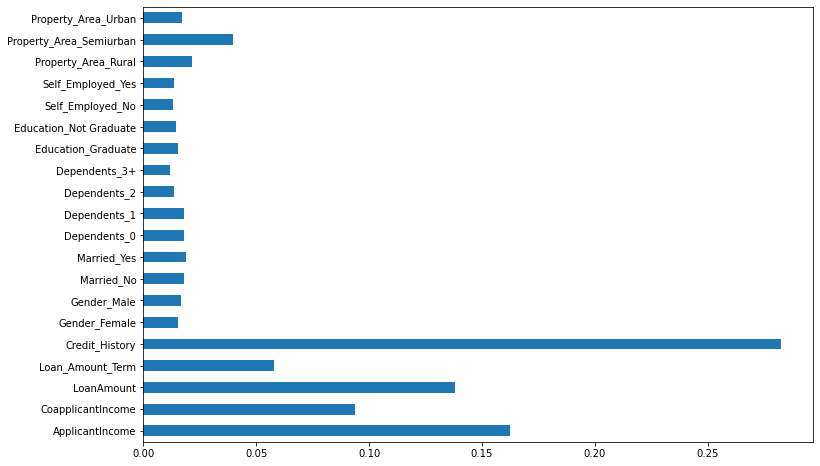

In [173]:
importances = pd.Series(model2.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [229]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
missing_vals(test)

In [235]:
pred_test = model2.predict(test)

In [236]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")

In [259]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

result = pd.DataFrame(submission, columns=['Loan_ID','Loan_Status'])
result.to_csv('Random_Forest.csv', index=False)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
